محمد مهدی میرزاعلی محمدی


 The dataset is available on google drive and can be accessed by following the link below
 https://drive.google.com/drive/folders/1mQb08oG0IujOFR0w9JYHtVX8V5jZGVuk?usp=sharing


 The trained model is available on google drive and can accessed by the following link
 https://drive.google.com/drive/folders/1LmEoC9DFfGA3DX-QeIVb1_kiFnphBI1P?usp=sharing

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import time


In [4]:
# load the trained modle(mobile net)
model_path = '/content/drive/MyDrive/Colab_Notebooks/covid_19/personal_model/saved_model'

loaded_model = tf.keras.saving.load_model(model_path)

In [5]:
# build a function to plot the CM
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
# prepare test batches
test_path = '/content/drive/MyDrive/Colab_Notebooks/covid_19/personal_model/personal_dataset/test'
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=1, shuffle=False)

test_labels = test_batches.classes

# use the time library to compute the prediction time
start_time = time.time()

predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

end_time = time.time()
runtime = end_time - start_time

cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Found 137 images belonging to 2 classes.


Prediction runtime: 10.292502164840698 seconds
Confusion matrix, without normalization
[[61  3]
 [ 0 73]]


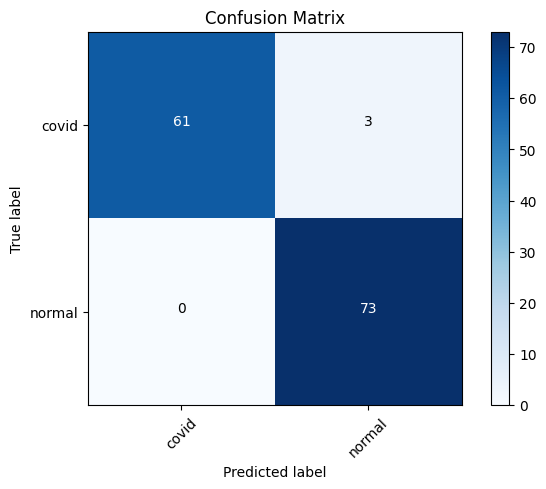

In [9]:
cm_plot_labels = ['covid', 'normal']
print("Prediction runtime:", runtime, "seconds")
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')